# Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the **scatterplot**. 

In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

## matplotlib.pyplot.scatter()
One basic way of creating a scatterplot is through Matplotlib's **scatter** function:

### Example 1 a. Scatter plot showing negative correlation between two variables

In [1]:
# Import numpy and pandas to store our data
import numpy as np
import pandas as pd
# Import matplotlib and seaborn to create our visulaizations
import matplotlib.pyplot as plt
import seaborn as sb

# Magic command to allow plots to be rendered inside the notebook
%matplotlib inline

In [2]:
# TO DO: Necessary import

# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


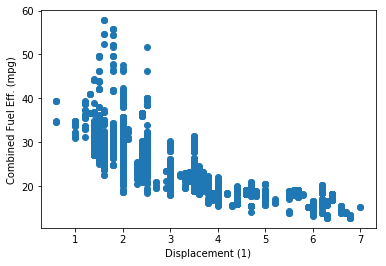

In [3]:
# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

## Alternative Approach - seaborn.regplot()
Seaborn's **regplot()** function combines scatterplot creation with regression function fitting:

### Example 1 b. Scatter plot showing negative correlation between two variables

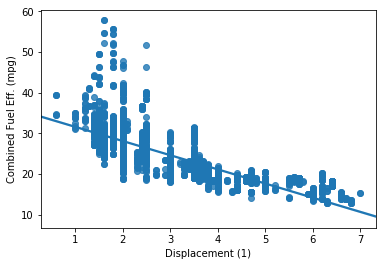

In [4]:
# The basic function parameters, "data", "x", and "y" are the same for regplot as they are for matplotlib's scatter.
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

The regression line in a scatter plot showing a negative correlation between the two variables.

### Example 2. Scatter plot showing a positive correlation between two variables
Let's consider another plot shown below that shows a positive correlation between two variables.

![title](pics/l4-c02-scatterplot2.png)

In the scatter plot above, by default, the regression function is linear and includes a shaded confidence region for the regression estimate. 

In this case, since the trend looks like a log(y) ∝ x relationship (that is, linear increases in the value of x are associated with linear increases in the log of y), plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set **fit_reg = False** in the regplot function call.

You can even plot the regression line on the transformed data as shown in the example below. For transformation, use a similar approach as you've learned in the last lesson.

### Example 3. Plot the regression line on the transformed data

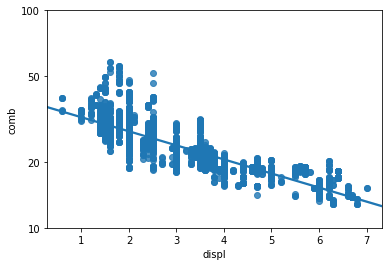

In [5]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

Regression line on a scattered plot based on the log-transformed data

Note - In this example, the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.

## Overplotting, Transparency, and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Let's see an example below for each Jitter to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's **scatter()** function, but is a built-in option with seaborn's **regplot()** function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

### Example 1. Jitter - Randomly add/subtract a small value to each data point

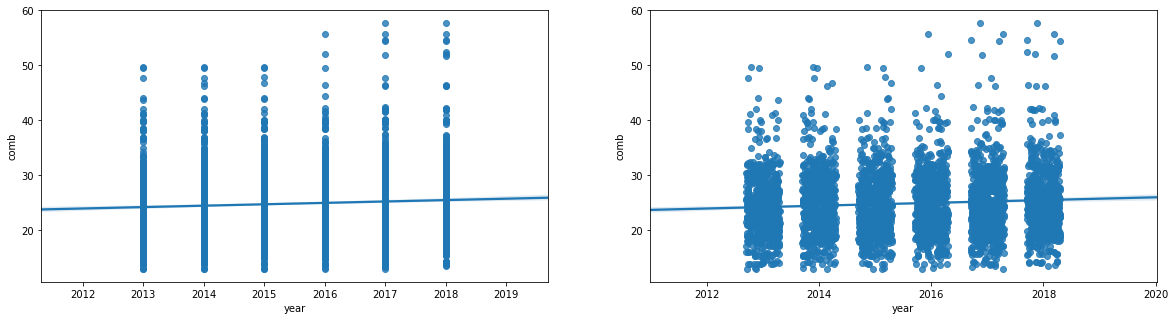

In [6]:
##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

The scatter plot on left showing a simple scatter plot, while the right one presents with jitter.

In the left scatter plot above, the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points.

You can add transparency to either **scatter()** or **regplot()** by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). See the example below.

### Example 2. Plot with both Jitter and Transparency

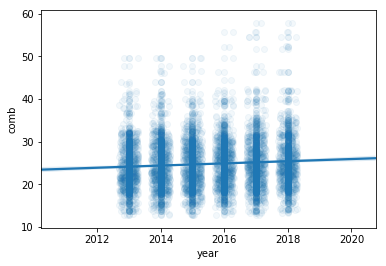

In [7]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

Plot all points with Jitter, and transparency.

In the plot above, the jitter settings will cause each point to be plotted in a uniform ±0.3 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter.